### Action 1
* Make sure your team members' labeled datasets are shared
* Place in one local directory on your laptop
* Specify if you labeled the same or different data as each other with a suffix 1 (Yes) or 2 (No) — first cell below
* Then run the subsequent cells below to access the labeled datasets in the one local directory

In [1]:
# specify your initials plus a suffix 1 or 2 for which dataset you labeled
initials_1 = "CB1" # person 1, dataset 1
initials_2 = "LB2" # person 2, dataset 1

In [2]:
# import modules to use their functions
import numpy as np
import pandas as pd
import random

# set option below so Pandas dataframe can output readable text, not truncated
pd.set_option('display.max_colwidth', 0)

In [3]:
# read csv files into a dataframe
dfraw_1 = pd.read_csv("step1_data_labeled_" + initials_1 + ".csv")
dfraw_2 = pd.read_csv("step1_data_labeled_" + initials_2 + ".csv")

dfraw_2['label'] = np.where(dfraw_2['label'] == 1, 'suicide', 'non-suicide')

In [4]:
dfraw_1.head()

,Id,text,label
0,662,"I'm so tired and I feel like I don't even know myself.I'm so tired of the cycle of a coin flip to see if i'll be happy or miserable the next day. I self harmed today when I havent in weeks.\n\n I'm tired of feeling like a failure, burden, and a ""leech"" to my parents and friends. \n\nI'm tired of feeling like there's someone else controlling my emotions where they flip a switch from me feeling okay to miserable. I started therapy and It's only making me feel like more of a burden due to costs.\n\nI'm tired of my mind treating me as a bully, constant insults and telling me to kill myself.\n\nIm tired of having to write posts in r/suicidewatch.",suicide
1,713,Why does my mood gotta be changing all the time 🙄🙄🙄 😭\n\n😭😭\n\n😭😭😭\n\n😭😭😭😭\n\n😭😭😭😭😭\n\n😭😭😭😭😭😭\n\n😭😭😭😭😭😭😭\n\n😭😭😭😭😭😭😭😭\n\n😭😭😭😭😭😭😭😭😭\n\n😭😭😭😭😭😭😭😭😭😭\n\nLike 🙄 earlier i was in a good mood 😬 why do i gotta be sad now 😔✌,non-suicide
2,1132,1984 is when..... I get banned from Arby’s after I shoved my cock up the soda fountain while screaming racial slurs,non-suicide
3,1448,"The only thing keeping me alive is the fact that Im scaredIm scared that it will hurt. Im scared of hanging myself because I know thats painful for at lest a little bit before youre gone. Im afraid of jumping in front of a train because what if I dont die right away and suffer until I die- and who knows how long that would take. Im afraid of jumping because im afraid of height in general and again, what if I dont die on impact. I cant shoot myself because I dont have a gun, but even then maybe Ill fuck it up and die from bleeding out or something instead dying the second the bullet hits me. I don't want to live, but I'm just too afraid to die",suicide
4,2078,Looks down &amp;#x200B;\n\nhttps://preview.redd.it/g4chl7p2qem61.jpg?width=1245&amp;format=pjpg&amp;auto=webp&amp;s=89af0ed1fa6e097e1e0f6c04462da3daeb3011a8,non-suicide


In [5]:
dfraw_2.head()

,Id,text,label
0,373,Boys and girls there a reason we wear hoods even when it’s sprinkling Because a tree will drop a giant drop of water right on face and it will get you all wet.,non-suicide
1,1443,time flies guys I was at wrestling almost 24 hrs ago. I’m not sure what happened and how all that time passed so quickly. I’m headed there again soon. I have a match soon next week. I’m nervous but also pretty excited. We’ll see how this goes. Does time ever fly by for you guys?,non-suicide
2,2023,"Did you know? Watermelons are slightly alcoholic.\n\nThe rind of the fruit creates a substance that mixes with the juice of the melons, equaling the alcoholic content of 2 beers, per 1 watermelon!",non-suicide
3,2763,"What’s karma I mean I’m not new to this site but wtf is karma like am I building up to something or what, and I see people calling each other karma whores like why do people want it so bad? Is it so they can brag about it IS THAT IT, IS THAT ALL ITS FOR. pls what am I supposed to do with karma 🤔",non-suicide
4,2767,"Good byeI always felt like those around me really take me for granted. I can’t do it anymore. I’m not perfect but I can at least say that I’ve tried. This world is not for me. I always wanted to leave a mark before I go. \n\nPlease if you have someone who’s not too far gone like I am, talk to them. Be there for them. Support them. They need you more than ever. Don’t let them slip. You will regret it when they’re gone. \n\nThe world would be a better place if there was more love.",non-suicide


## Action 2

In [6]:
# If multiple people labeled the SAME data points, run below. Else see the subsequent ACTION 2b.
if initials_1[-1:] == initials_2[-1:]:

    # save copies of the columns for comparison
    dfraw_1["label_1"] = dfraw_1["label"].copy()
    dfraw_2["label_2"] = dfraw_2["label"].copy()

    # drop a column before merge
    dfraw_1 = dfraw_1.drop(columns=["label"])
    dfraw_2 = dfraw_2.drop(columns=["label"])

    # merge the two datasets
    df = pd.merge(dfraw_1, dfraw_2, how="outer", on=["Id", "text"])
    df = df.sort_values("Id")
    
    df['label'] = np.where(df['label_1']==df["label_2"], df["label_1"], "")

    # check number of rows and columns
    print(df.shape)

    # drop rows that have missing values for label
    df3 = df.dropna(axis=0, subset=['label'])
    
    # to simplify, delete disagreements
    df3 = df3[df3["label"]!=""]
    
    print("yes")
    display(df3.head(n=10))

# If multiple people labeled DIFFERENT data points, run below to concatenate your labeled datasets vertically
elif initials_1[-1:] != initials_2[-1:]:
    
    df3 = pd.concat([dfraw_1, dfraw_2])

    print(dfraw_1.shape)
    print(dfraw_2.shape)
    print(df3.shape)
    
    print("no")
    display(df3.head(n=10))

(500, 3)
(450, 3)
(950, 3)
no


,Id,text,label
0,662,"I'm so tired and I feel like I don't even know myself.I'm so tired of the cycle of a coin flip to see if i'll be happy or miserable the next day. I self harmed today when I havent in weeks.\n\n I'm tired of feeling like a failure, burden, and a ""leech"" to my parents and friends. \n\nI'm tired of feeling like there's someone else controlling my emotions where they flip a switch from me feeling okay to miserable. I started therapy and It's only making me feel like more of a burden due to costs.\n\nI'm tired of my mind treating me as a bully, constant insults and telling me to kill myself.\n\nIm tired of having to write posts in r/suicidewatch.",suicide
1,713,Why does my mood gotta be changing all the time 🙄🙄🙄 😭\n\n😭😭\n\n😭😭😭\n\n😭😭😭😭\n\n😭😭😭😭😭\n\n😭😭😭😭😭😭\n\n😭😭😭😭😭😭😭\n\n😭😭😭😭😭😭😭😭\n\n😭😭😭😭😭😭😭😭😭\n\n😭😭😭😭😭😭😭😭😭😭\n\nLike 🙄 earlier i was in a good mood 😬 why do i gotta be sad now 😔✌,non-suicide
2,1132,1984 is when..... I get banned from Arby’s after I shoved my cock up the soda fountain while screaming racial slurs,non-suicide
3,1448,"The only thing keeping me alive is the fact that Im scaredIm scared that it will hurt. Im scared of hanging myself because I know thats painful for at lest a little bit before youre gone. Im afraid of jumping in front of a train because what if I dont die right away and suffer until I die- and who knows how long that would take. Im afraid of jumping because im afraid of height in general and again, what if I dont die on impact. I cant shoot myself because I dont have a gun, but even then maybe Ill fuck it up and die from bleeding out or something instead dying the second the bullet hits me. I don't want to live, but I'm just too afraid to die",suicide
4,2078,Looks down &amp;#x200B;\n\nhttps://preview.redd.it/g4chl7p2qem61.jpg?width=1245&amp;format=pjpg&amp;auto=webp&amp;s=89af0ed1fa6e097e1e0f6c04462da3daeb3011a8,non-suicide
5,4204,"Do you ever feel like this Today I saw my best friend and he talked about his summer: he said he started to smoke, drink alcohol and had sex for the first time. This really surprised me because my summer was very calm and not a lot happened. I feel disoriented and lost, almost like I’m falling behind and I’m not “growing up” like all the others and I don’t know what to do. Any advice.\nP. S. Me and my friend are both 14.",suicide
6,6577,"So longWell i ruined my closest friendships by my suicidal thoughts and everyone’s just given up on me and they’re saying goodbye. I guess being honest doesn’t benefit anyone, i mean i shouldve known from the start. \n\nAnyways i’m clocking out, the faster im gone right?",suicide
7,7379,"its always the good shows that only have one season and then after all that waiting, the second season is absolute trash lol",non-suicide
8,7686,I got just a scam text It had a WhatsApp link and was in Arabic. Area code was from Kenya. And I live in the us. That doesn’t even make sense. If ur gonna scam do it right 🤦‍♂️,non-suicide
9,7790,What do yall think of this song? It's my favourite song [Crazy - Mushroomhead](https://youtu.be/O-gKPEdn3eQ),non-suicide


### Action 3
Simply run the steps below, which creates a baseline model on your labeled dataframe, df4

In [7]:
df4 = df3.copy()
# drop rows that have missing values for label
df4 = df4.dropna(axis=0, subset=['label'])
df4[df4["label"]==""].head()

,Id,text,label


In [8]:
df4.head()

,Id,text,label
0,662,"I'm so tired and I feel like I don't even know myself.I'm so tired of the cycle of a coin flip to see if i'll be happy or miserable the next day. I self harmed today when I havent in weeks.\n\n I'm tired of feeling like a failure, burden, and a ""leech"" to my parents and friends. \n\nI'm tired of feeling like there's someone else controlling my emotions where they flip a switch from me feeling okay to miserable. I started therapy and It's only making me feel like more of a burden due to costs.\n\nI'm tired of my mind treating me as a bully, constant insults and telling me to kill myself.\n\nIm tired of having to write posts in r/suicidewatch.",suicide
1,713,Why does my mood gotta be changing all the time 🙄🙄🙄 😭\n\n😭😭\n\n😭😭😭\n\n😭😭😭😭\n\n😭😭😭😭😭\n\n😭😭😭😭😭😭\n\n😭😭😭😭😭😭😭\n\n😭😭😭😭😭😭😭😭\n\n😭😭😭😭😭😭😭😭😭\n\n😭😭😭😭😭😭😭😭😭😭\n\nLike 🙄 earlier i was in a good mood 😬 why do i gotta be sad now 😔✌,non-suicide
2,1132,1984 is when..... I get banned from Arby’s after I shoved my cock up the soda fountain while screaming racial slurs,non-suicide
3,1448,"The only thing keeping me alive is the fact that Im scaredIm scared that it will hurt. Im scared of hanging myself because I know thats painful for at lest a little bit before youre gone. Im afraid of jumping in front of a train because what if I dont die right away and suffer until I die- and who knows how long that would take. Im afraid of jumping because im afraid of height in general and again, what if I dont die on impact. I cant shoot myself because I dont have a gun, but even then maybe Ill fuck it up and die from bleeding out or something instead dying the second the bullet hits me. I don't want to live, but I'm just too afraid to die",suicide
4,2078,Looks down &amp;#x200B;\n\nhttps://preview.redd.it/g4chl7p2qem61.jpg?width=1245&amp;format=pjpg&amp;auto=webp&amp;s=89af0ed1fa6e097e1e0f6c04462da3daeb3011a8,non-suicide


In [9]:
#!pip install install -U scikit-learn
#!pip install scipy

In [10]:
# import additioanl modules
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold

In [11]:
# write variation of code, but remove ending s (make plural words singular)
# http://stackoverflow.com/questions/3675318/how-to-replace-the-some-characters-from-the-end-of-a-string

import re

def replace_ending_s(orig_string):
    head, sep, tail = orig_string.rpartition("s")
    if orig_string[len(orig_string)-1] in ("s"):
        return head
    else:
        return orig_string
    
def first_preprocessor(s):
    #convert to lowercase (which default of vectorizers do)
    s = s.lower()
    
    # remove select punctation
    s = re.sub("[,.!?:;/~*]", " ", s)
    
    # remove _ as the end of word
    s = re.sub("[_]+", " ", s)
    
    # remove _ as start of the word
    s = re.sub("\s[_]+", " ", s)

    # replace multiple consecutive blank spaces with 1 blank space
    s = re.sub("[ ]+", " ", s)

    return s

In [12]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df4["text"])

# class_weight uses weights, so each class has the same importance rather than the proportion
# of labels in the data rather than specifying λ, you specify C=1/λ.
model = LogisticRegression(class_weight="balanced", random_state=0)
model.fit(vectors, df4["label"]) # data the regression uses for the coefficients to find the model

#p = model.predict_proba(vectors)[:,1]
#roc_auc_score(df4['label_0'], p)

LogisticRegression(class_weight='balanced', random_state=0)

### Action 4
Run baseline model on unlabeled dataframe, df5

In [13]:
df5 = pd.read_csv("Suicide_Detection_df2.csv")

vectors2 = vectorizer.transform(df5['text'])
df5['prob'] = model.predict_proba(vectors2)[:,1]

print("# before drop duplicates:", len(df5))
df5 = df5.drop_duplicates(subset=["text"], keep ="last")
print("# after drop duplicates:", len(df5))    

df5.head()

# before drop duplicates: 450
# after drop duplicates: 450


,Id,text,label,prob
0,343887,Banned on the discord All I did was post a meme in general by accident 😔,NaN,0.205485
1,39533,I let my mom write something in this sub she saved it as a draft I am proud of her Hi teenagers I hope all of you are happy now that school is opening up I hope each of you have good semester or year in these dark times we need to stay strong and stay inside also if you go out please don't forget to wear a mask also for those who work in minimum wage and have to deal with woman screaming at you for calling manager just tell her to get out if she doesn't like the place I hate those type of woman also if you see that she doesn't have a mask on tell her to get out she is risking health of many people Covid-19 is not a joke wear a mask at all cost,NaN,0.153079
2,162175,QuestionCan I show up on a hospital and ask to get help if I deal with suicidal thoughts or depressioN? Im not really informed and I dont want to look bad..,NaN,0.266386
3,328105,how do i get my friends away from tiktok preferably to reddit theyre doing shitty pranks on me and recording me without my permission etc pls help thank,NaN,0.232985
4,237778,God is hunting me for sport and the clap of my massive cock is making it easier for him. ^filler ^filler ^filler ^filler ^filler ^filler ^filler,NaN,0.125762


### Action 5a
Evaluate graph distribution of model's predicted probabilities that text indicates suicide

Distribution of data points by probability:


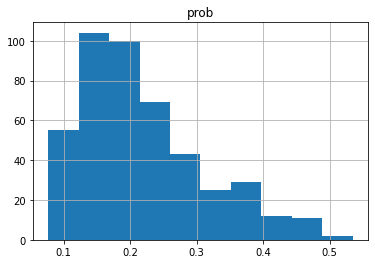

In [14]:
def show_counts_by_probability_buckets(df):
    #print("Count of data points by buckets of probability:")
    for i in range(0,10):
        low_mark = i * 1.0 / 10;
        high_mark = (i + 1) * 1.0 / 10;
        count = sum((low_mark <= df['prob']) & (df['prob'] < high_mark))
        #print("[", low_mark, ", ", high_mark, ") = ", count)

    print("Distribution of data points by probability:")
    pd.DataFrame.hist(df, column='prob')
    
# view distribution of data points by probability for dataframe, df2
show_counts_by_probability_buckets(df5)

### Action 5b
With the graph above, which data points will you label strategically?

Decisions:
* Where is your model most unsure, based on its predicted probabilities?
* Between which confidence thresholds do you prefer to label your next data points? Update the numeric values in cell below, as needed.

In [15]:
threshold_lower = 0.215
threshold_upper = 0.215

### Action 6
Run code to output the data points to a "step2" csv file that you'll label in the next notebook

In [16]:
df5[(df5['prob'] >= threshold_lower) & 
    (df5['prob'] <= threshold_upper)].to_csv("step2_data_unlabeled.csv", 
                                             index=False, header=True)

### Action 7
* Run your model on the dataset below
* Sign up with your berkeley.edu account at https://www.kaggle.com/t/aa189eaae62b4c0e80858b838930f684. 
* Then submit your 1st round csv to Kaggle in-class leaderboard, https://www.kaggle.com/c/data-x-active-learning-spring-2022/leaderboard. 

In [17]:
df5 = pd.read_csv("Suicide_Detection_df3.csv")

vectors2 = vectorizer.transform(df5['text'])
df5['prob'] = model.predict_proba(vectors2)[:,1]
#df5["label"] = [-1 for i in range(0, len(df5))]
#df5.set_index("key", inplace=True)

print("# before drop duplicates:", len(df5))
df5 = df5.drop_duplicates(subset=["text"], keep ="last")
print("# after drop duplicates:", len(df5))    

# keep two columns, and rename the prob(abiity) column
df6 = df5[["Id", "prob"]].rename(columns={"prob":"label"})

# sort values by Id
df6 = df6.sort_values(by=['Id'])

# save results to csv
df6.to_csv("test.csv", index=False,header=True)

# print a reflection of what you will submit
df6.head()

# before drop duplicates: 4550
# after drop duplicates: 4550


,Id,label
1099,37,0.273204
1435,40,0.115110
4504,96,0.111282
3230,140,0.110015
609,200,0.157674
